<a href="https://colab.research.google.com/github/Shihab7u/Kidney-Disease-Detection-and-Classification/blob/main/Kidney_Detection_and_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!pip install --upgrade --no-cache-dir gdown

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: gdown
    Found existing installation: gdown 4.6.6
    Uninstalling gdown-4.6.6:
      Successfully uninstalled gdown-4.6.6


Import dataset

In [ ]:
!gdown --fuzzy https://drive.google.com/file/d/1-uXEr8wzQfOYfl7N1H_mS2xJSSdka4Tg/view?usp=share_link

Downloading...
From (uriginal): https://drive.google.com/uc?id=1-uXEr8wzQfOYfl7N1H_mS2xJSSdka4Tg
From (redirected): https://drive.google.com/uc?id=1-uXEr8wzQfOYfl7N1H_mS2xJSSdka4Tg&confirm=t&uuid=74983eff-101a-40c3-8655-7f5bdd23de3d
To: /content/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone.zip
100% 1.63G/1.63G [00:22<00:00, 71.9MB/s]


Unzip dataset

In [ ]:
!unzip "/content/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone.zip" > /dev/null

In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from keras.layers import Input
import seaborn as sns

Defining class

In [ ]:
path = os.listdir('/content/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/')
classes = {'Cyst':0, 'Normal':1, 'Stone':2, 'Tumor':3}

Append class in dataset

In [ ]:
import cv2
X = []
Y = []
for cls in classes:
    pth1 = '/content/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/'+cls
    for j in os.listdir(pth1):
        img = cv2.imread(pth1+'/'+j, 1) #0 for input shape (256,256,3) have to repalce 0 with 1
        img = cv2.resize(img, (224,224)) #256,256
        X.append(img)
        Y.append(classes[cls])

In [ ]:
X = np.array(X)
Y = np.array(Y)

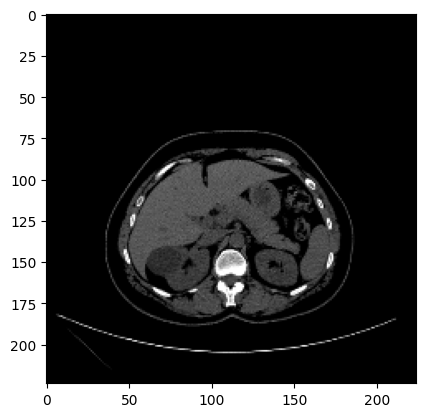

In [ ]:
plt.imshow(X[0], cmap='gray')

In [ ]:
X[0].shape

(224, 224, 3)

Split dataset into


1.   80% for training
2.   20% for testing



In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, random_state=10,test_size=.30) #random_state=10

In [ ]:
xtrain.shape, xtest.shape

((8712, 224, 224, 3), (3734, 224, 224, 3))

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
          rotation_range = 15,
          shear_range = 0.2,
          zoom_range = 0.2,
          horizontal_flip = True,
          width_shift_range=0.1,
          height_shift_range=0.1,
          vertical_flip=True,)

datagen.fit(xtrain)

Model Building

In [ ]:
#Model building starts
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input,Bidirectional,LSTM,Lambda, GRU
from tensorflow.keras.layers import Permute,GlobalMaxPool1D,Concatenate, Dense, BatchNormalization, Dropout, GlobalAveragePooling1D, GlobalAveragePooling2D
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.layers import Dense, Activation, Flatten,MaxPooling1D,Conv1D, Conv2D,MaxPool2D,MaxPooling2D
import tensorflow as tf

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout, Conv2D, MaxPool2D
from tensorflow.keras.applications import ResNet50

# Create the ResNet50 model
resnet = ResNet50(include_top=False, input_shape=(224, 224, 3))

# Freeze the weights of the ResNet50 model
for layer in resnet.layers:
    layer.trainable = False

# Create the CNN model
inputs = Input(shape=(224, 224, 3))
x = Conv2D(filters=64, kernel_size=(20,20), activation='relu')(inputs)
x = MaxPool2D(pool_size=(2,2))(x)
x = Dropout(0.5)(x)
x = Conv2D(filters=128, kernel_size=(15,15), activation='relu')(x)
x = MaxPool2D(pool_size=(2,2))(x)
x = Dropout(0.5)(x)
x = Conv2D(filters=128, kernel_size=(10,10), activation='relu')(x)
x = MaxPool2D(pool_size=(2,2))(x)
x = Dropout(0.5)(x)
x = Conv2D(filters=128, kernel_size=(5,5), activation='relu')(x)
x = MaxPool2D(pool_size=(2,2))(x)
x = Dropout(0.5)(x)
x = Flatten()(x)
x = Dense(256, activation="relu")(x)
x = Dropout(0.5)(x)

# Concatenate the ResNet50 model and the CNN model
resnet_outputs = resnet(inputs)
resnet_flatten = Flatten()(resnet_outputs)
combined = tf.keras.layers.concatenate([x, resnet_flatten])
outputs = Dense(4, activation="softmax")(combined)

# Combine the models
model = Model(inputs=inputs, outputs=outputs)

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

94765736/94765736 [==============================] - 0s 0us/step


In [ ]:
# model.compile(optimizer='Adam',
#             loss='sparse_categorical_crossentropy',
#              metrics=["accuracy"])

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 205, 205, 64  76864       ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 102, 102, 64  0           ['conv2d[0][0]']                 
                                )                                                             

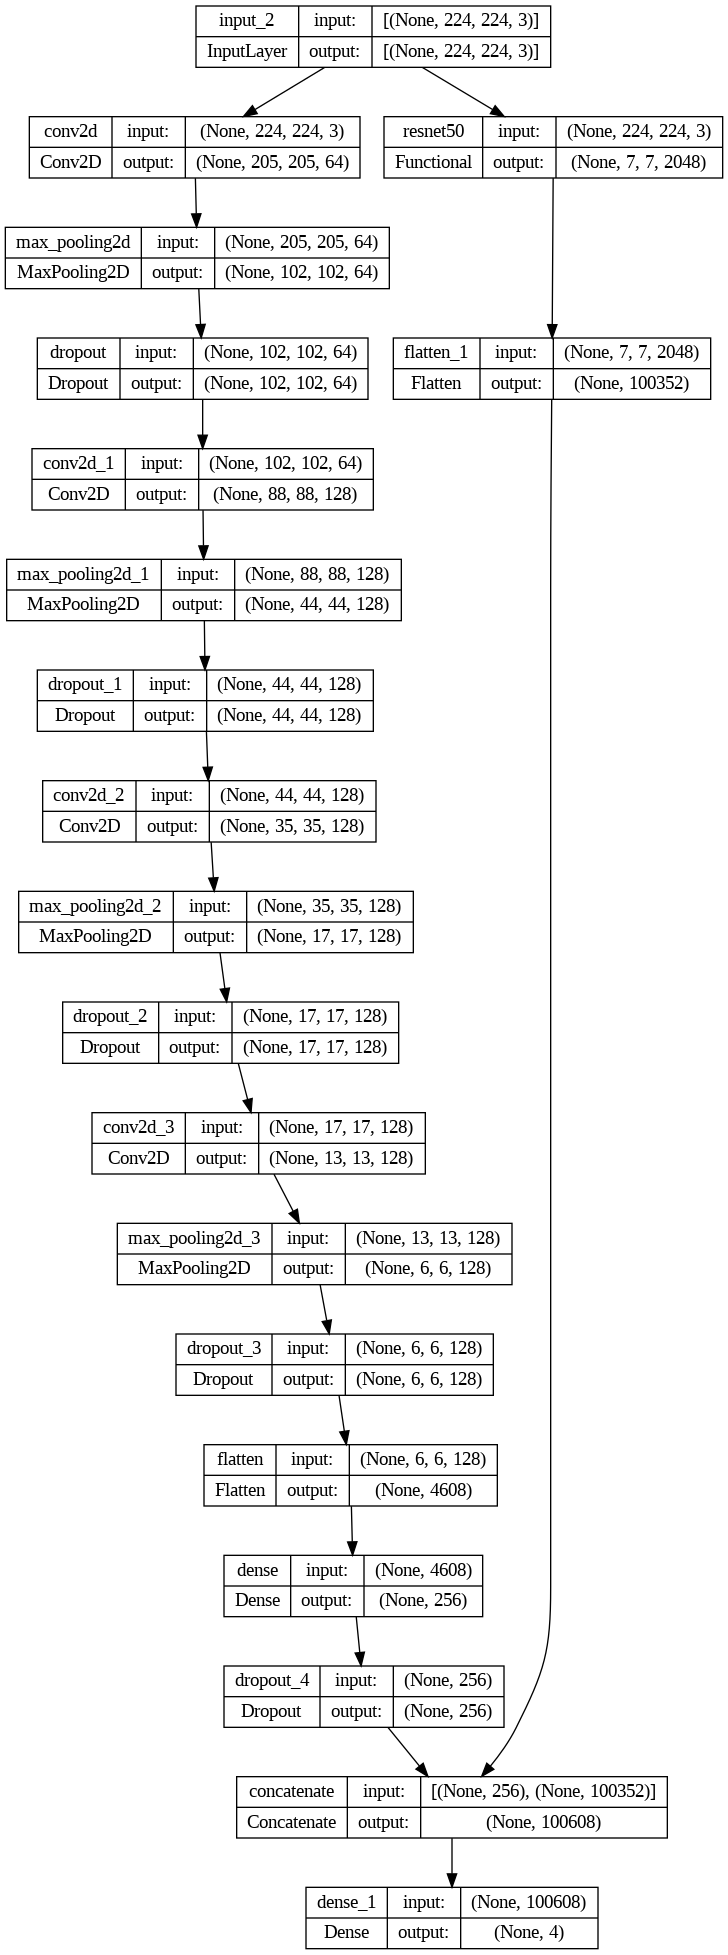

In [ ]:
# plot model architecture
from keras.utils import plot_model
plot_model(model, show_shapes=True, to_file='ResNN50 Architecture.png')

In [ ]:
r=model.fit(xtrain,
          ytrain,
          epochs=80,
          batch_size=32,
          verbose=1,
          validation_data=(xtest,ytest),
          shuffle=False
          )

Epoch 1/80
273/273 [==============================] - 138s 390ms/step - loss: 3.3378 - accuracy: 0.9205 - val_loss: 0.0722 - val_accuracy: 0.9912
Epoch 2/80
273/273 [==============================] - 100s 366ms/step - loss: 0.0899 - accuracy: 0.9924 - val_loss: 0.3588 - val_accuracy: 0.9721
Epoch 3/80
273/273 [==============================] - 95s 347ms/step - loss: 0.1458 - accuracy: 0.9881 - val_loss: 0.0764 - val_accuracy: 0.9941
Epoch 4/80
273/273 [==============================] - 94s 346ms/step - loss: 0.2411 - accuracy: 0.9874 - val_loss: 0.1764 - val_accuracy: 0.9906
Epoch 5/80
273/273 [==============================] - 100s 365ms/step - loss: 0.0389 - accuracy: 0.9977 - val_loss: 0.0674 - val_accuracy: 0.9960
Epoch 6/80
273/273 [==============================] - 100s 365ms/step - loss: 0.0915 - accuracy: 0.9938 - val_loss: 0.0471 - val_accuracy: 0.9941
Epoch 7/80
273/273 [==============================] - 100s 365ms/step - loss: 0.3417 - accuracy: 0.9882 - val_loss: 0.0502 - v

Training vs validation loss

In [ ]:
import pandas as pd
loss_df = pd.DataFrame(model.history.history)
loss_df.columns

Index(['loss', 'accuracy', 'val_loss', 'val_accuracy'], dtype='object')

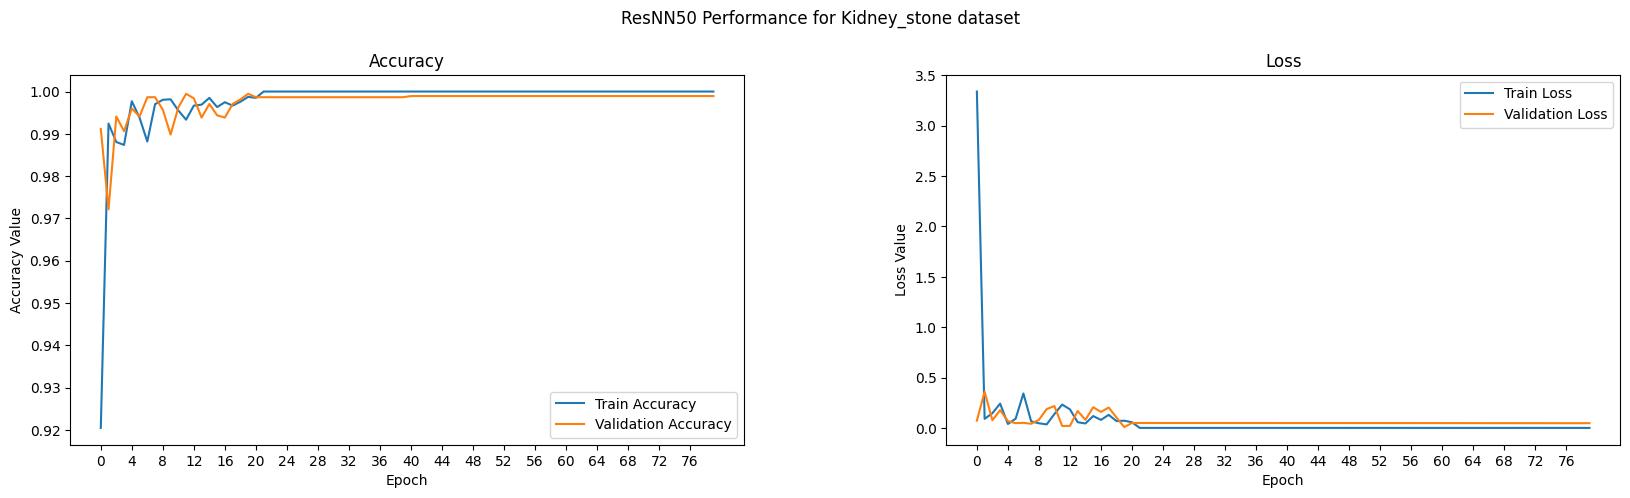

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))
t = f.suptitle('ResNN50 Performance for Kidney_stone dataset', fontsize=12 )
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(0,80))
ax1.plot(epoch_list, r.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, r.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 80, 4))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, r.history['loss'], label='Train Loss')
ax2.plot(epoch_list, r.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 80, 4))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")


plt.savefig('CNN Performance for Kidney_stone dataset.png')

Training vs validation accuracy

Training vs validation Loss accuracy

In [ ]:
pred=model.predict(xtest)
Y_pred = np.argmax(pred, 1)

117/117 [==============================] - 16s 129ms/step


In [ ]:
Y_pred.shape

(3734,)

In [ ]:
ytest.shape

(3734,)

In [ ]:
ypred = np.argmax(pred, axis=1)

Classification report

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print('Confusion Matrix')
print(confusion_matrix(ytest, ypred))

Confusion Matrix
[[1131    0    2    1]
 [   0 1548    0    0]
 [   0    0  395    0]
 [   0    1    0  656]]


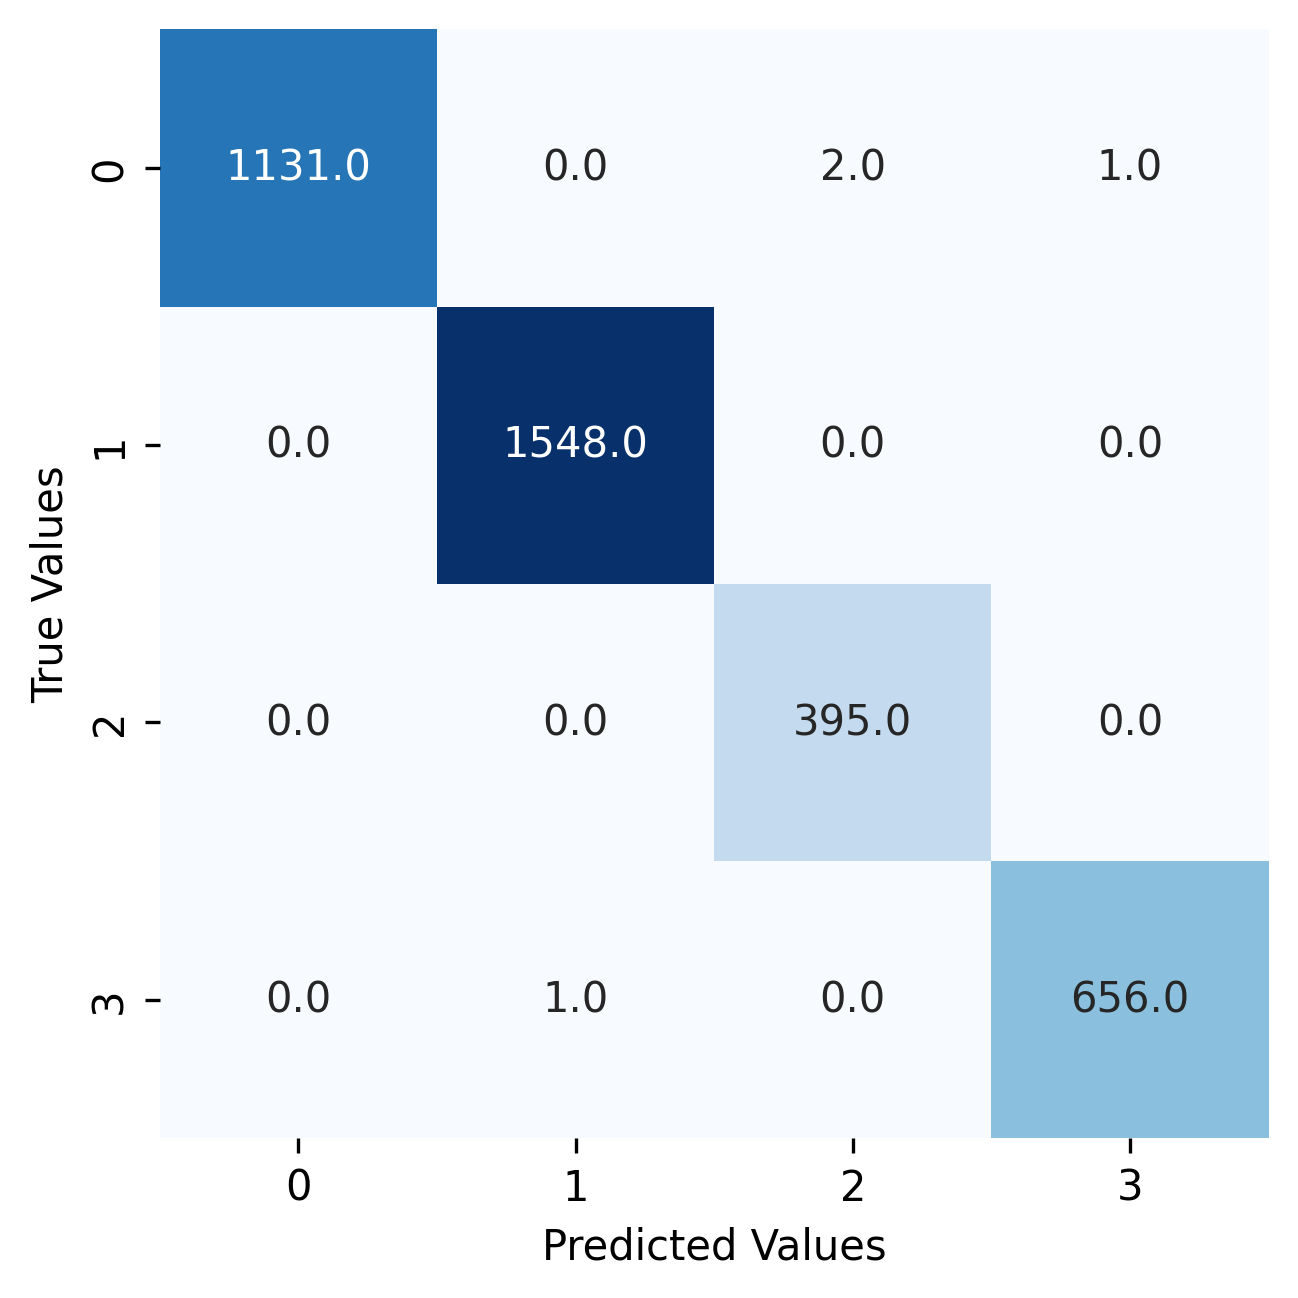

In [ ]:
import seaborn as sns
cm=confusion_matrix(ytest, ypred)
plt.figure(dpi=300),sns.heatmap(cm, square=True, annot=True, fmt=".1f", cbar=False, cmap=plt.cm.Blues)
plt.xlabel('Predicted Values')
plt.ylabel('True Values');


In [ ]:
print('Classification Report')
target_names = ['Normal', 'Cyst', 'Stone', 'Tumor']
print(classification_report(ytest, ypred, target_names=target_names))

Classification Report
              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00      1134
        Cyst       1.00      1.00      1.00      1548
       Stone       0.99      1.00      1.00       395
       Tumor       1.00      1.00      1.00       657

    accuracy                           1.00      3734
   macro avg       1.00      1.00      1.00      3734
weighted avg       1.00      1.00      1.00      3734



In [ ]:
print(ytrain)

[1 0 3 ... 0 1 0]


[Text(0, 0.5, 'Normal'),
 Text(0, 1.5, 'Cyst'),
 Text(0, 2.5, 'Stone'),
 Text(0, 3.5, 'Tumor')]

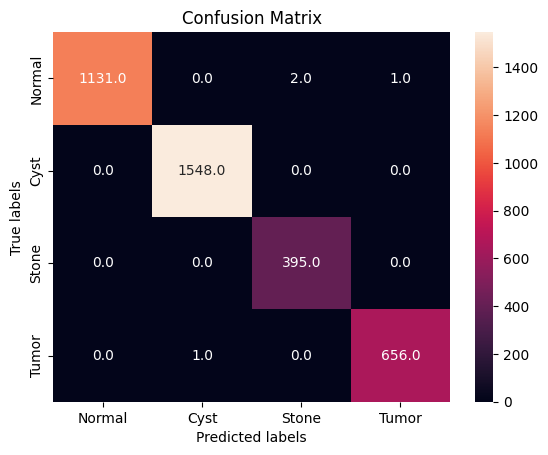

<Figure size 1920x1440 with 0 Axes>

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


ax= plt.subplot()
plt.figure(dpi=300),sns.heatmap(cm, annot=True, ax = ax, fmt=".1f"); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['Normal', 'Cyst', 'Stone', 'Tumor']); ax.yaxis.set_ticklabels(['Normal', 'Cyst', 'Stone', 'Tumor'])


Confusion Matrix :
[[1131    0    2    1]
 [   0 1548    0    0]
 [   0    0  395    0]
 [   0    1    0  656]]
Accuracy Score : 0.9989287627209427
Report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1134
           1       1.00      1.00      1.00      1548
           2       0.99      1.00      1.00       395
           3       1.00      1.00      1.00       657

    accuracy                           1.00      3734
   macro avg       1.00      1.00      1.00      3734
weighted avg       1.00      1.00      1.00      3734



(<Figure size 1920x1440 with 2 Axes>, <Axes: >)

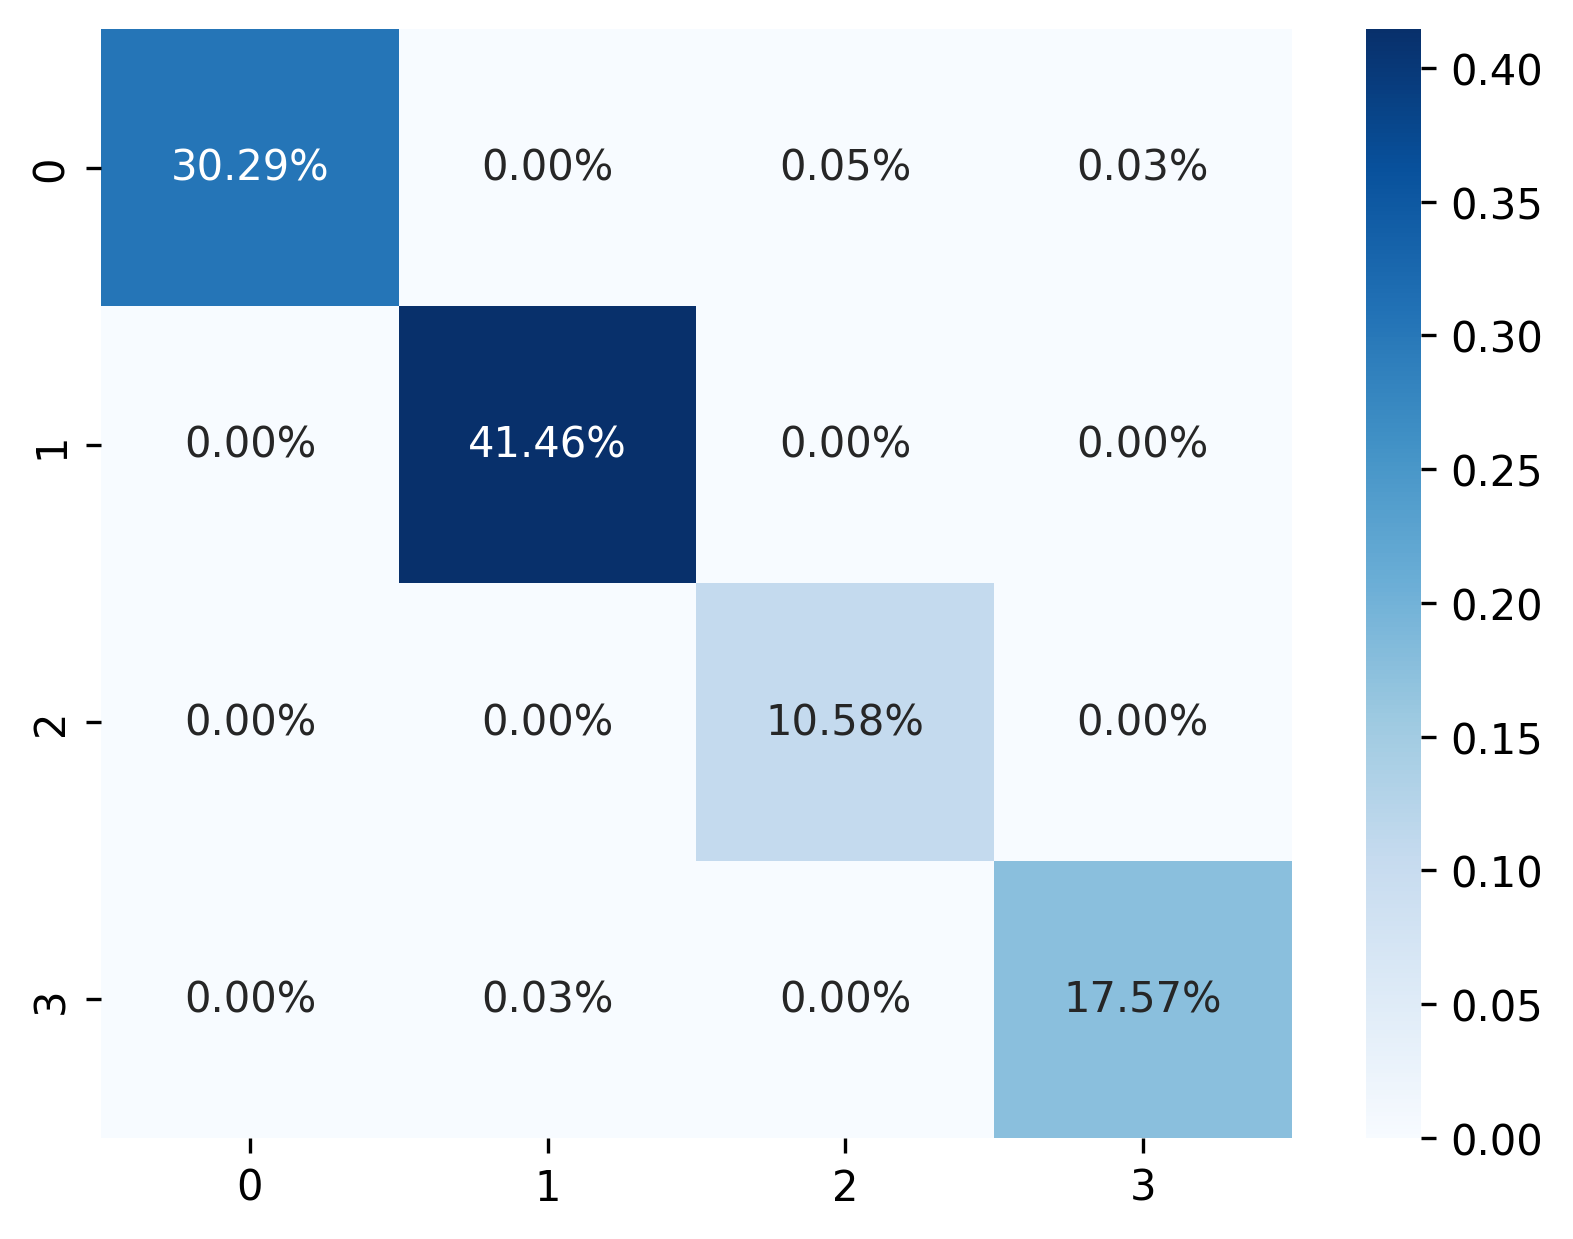

In [ ]:
from sklearn.metrics import accuracy_score
results = confusion_matrix(ytest,ypred)
print('Confusion Matrix :')
print(results)
print('Accuracy Score :',accuracy_score(ytest,ypred))
print('Report : ')
print(classification_report(ytest,ypred))

plt.figure(dpi=300),sns.heatmap(results/np.sum(results), annot=True,
            fmt='.2%', cmap='Blues')

In [ ]:
import numpy as np
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(ytest, ypred, pos_label=3)
metrics.auc(fpr, tpr)

0.9992580094173444

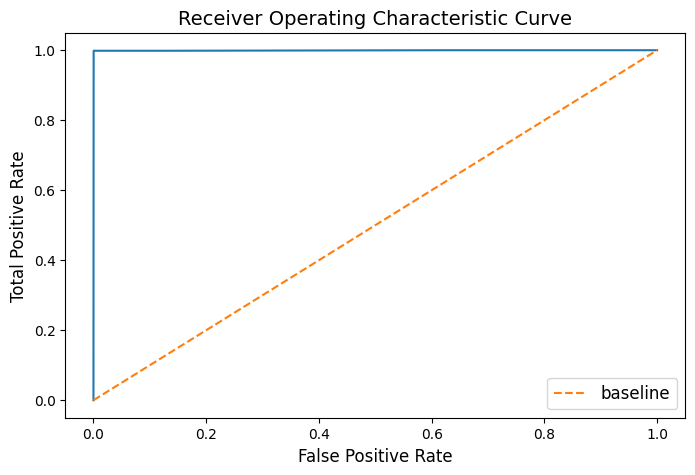

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(fpr, tpr)
ax.plot(np.linspace(0, 1, 100),
         np.linspace(0, 1, 100),
         label='baseline',
         linestyle='--')
plt.title('Receiver Operating Characteristic Curve', fontsize=14)
plt.ylabel('Total Positive Rate', fontsize=12)
plt.xlabel('False Positive Rate', fontsize=12)
plt.legend(fontsize=12);